# Sleep and Exercise
#### Luke Martin
#### Quantified Self: Data Science Project
#### CPSC 222

## Sources
This project makes use of information from the following sources:
  
* Dr. Sprint's [CPSC 222 Course Materials](https://github.com/GonzagaCPSC222)

* Python Standard Library [Documentation Pages](https://docs.python.org/3/library/)

* Pandas [Documentation Pages](https://pandas.pydata.org/docs/)

* [Python Basics](https://pythonbasics.org/)

* MatPlotLib [Documention Pages](https://matplotlib.org/)

Links to specific pages are included throughout as they are relavent.

## Introduction

My project was analyzing my sleep and exercise data collected from my Fitbit device. I wanted to see what relationship, if any, I could draw between the amount of exercise I got in a given day, and the quality of sleep I got that following night. 

#### Project Domain

This project works in the health domain. Sleep and exercise are vital aspects of a person's daily life, and they have great effects on a person's health. Improving either creates a much healthier lifestyle.

#### Stakeholders and Impact

The results of this project are quite relevant to problems facing the US today. Obesity has been and continues to be an extraordinary problem in America, with millions suffering from obesity-caused heart disease and premature death. Any sort of additional motivation to get more exercise can be benfecial to the entire population. Everyone could benefit from a better night's sleep. If there is a proven relationship between exercise and sleep, then it could promote more exercise. The specific stakeholders in this project are the medical industry and the physical education field. Both areas could greatly benefit from additional information that could motivate people to exercise more. I personally could benefit from this project; even if I can't prove that more exercise will lead to better sleep, it will make me more aware of how much (or little) I exercise and motivate me to increase that amount. This will ultimately lead to a healthier life for myself. My motivation for choosing this project was the sleep aspect; if I could do anything to improve my sleep quality, I would absolutely make that change.

#### Dataset and Data Collection

I used my Fitbit device, an older version of the Charge HR, to collect sleep and activity data for the past few months. It tracked data like calories burned, steps taken, minutes active, minutes asleep, times awoken, and similar attributes. I was able to export my data directly from the [Fitbit website](https://www.fitbit.com/settings/data/export) as two CSV files: one for sleep and one for activity.

#### Hypotheses

I hypothesize, through personal experience and past readings, that the amount of exercise I get during the day could improve the quality of sleep I get at night. The hypothesis testing will be the main way I examine this possibility. 

#### Classification Task

In order to use classifier algorithms, I had to create my own instance label. That was the one downfall to this dataset: there was no class label. I then used the exercise data to try to predict the quality of sleep that I would get on a certain night.

#### Results

There was significant statistical evidence to suggest that the amount of exercise I got was higher on days when I got better sleep that night. I could not, however, prove that I was awake more of the time in bed on days when I was inactive compared to days that I was active. For my classifiers, the kNN algorithm was much more accurate than the decision tree classifer. However, it was not very accurate, and could only predict the sleep quality label for an instance with roughly 43% accuracy.

## Data Preperation
The Fitbit website allowed access to my personal data in a very friendly format. I had access to both my sleep and activity data gathered by my device from September 17, 2020 to the present. Looking at the data using Microsoft Excel, I could see that every entry is a numerical value, except for the date and time stamps. A few of the columns had to be converted from strings to integers due to commas. The activity CSV had one date column for which every other attribute had a corresponding value. The sleep CSV meanwhile, had two timestamp columns: one for the sleep start time and one for the sleep stop time. Dealing with them was my main task in preparing the data. 
### Cleaning (Spreadsheet)
Looking at both CSV files in Microsoft Excel, I saw that both top rows contained one cell that had the label for the data table.  
<img src="https://github.com/lmartin5/Sleep_and_Exercise_Project/blob/master/figures/data_with_label_row.PNG?raw=true"  width="500"/>  
Since this was a one-step process, for both CSV files I manually deleted the top row, so that the top row only contained the column labels. This made it easier for me to load the data into DataFrames.  
<img src="https://github.com/lmartin5/Sleep_and_Exercise_Project/blob/master/figures/data_without_label_row.PNG?raw=true"  width="500"/>

### File Organization
To keep this project organized, I kept all of my data files in one folder. To have access to the files within the folder and have the path code work on all of the main operating systems, I used the Python `OS` module and its [`path.join()`](https://docs.python.org/3/library/os.path.html) function. The first files I accessed were the two CSV files that contained my sleep and activity data.

In [1]:
import os

sleep_data_path = os.path.join("files", "fitbit_sleep_data.csv")
activity_data_path = os.path.join("files", "fitbit_activity_data.csv")

### Loading the Data
`Pandas` was the main module used for working with the data, and the `read_csv()` function was used to load the data. The `index_col` key word in the `read_csv()` function was set to 0 when loading in the activity data because it already had the date in a usable format. More work was done using the time stamps in the sleep data to get a identical index column. The `set_option()` function was used to force the program to display all of the columns of the DataFrame as discussed [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html).

In [2]:
import pandas as pd

sleep_df = pd.read_csv(sleep_data_path)
activity_df = pd.read_csv(activity_data_path, index_col=0)
pd.set_option("display.max_columns", None)

There were three columns in the sleep DataFrame that only contained NaN values. These attributes are tracked by devices more advanced than the one used in this project, so they were dropped from the DataFrame. I also changed the column labels so that they were not so lengthy.

In [3]:
sleep_df.drop(["Minutes REM Sleep", "Minutes Light Sleep", "Minutes Deep Sleep"], axis=1, inplace=True)
sleep_df.columns = ["Start", "End", "Asleep", "Awake", "Times Awake", "Time in Bed"]
activity_df.columns = ["Cals", "Steps", "Distance", "Floors", "MS", "MLA", "MFA", "MVA", "Act. Cals"]

print("Sleep Data")
print(sleep_df.head())
print()
print("Activity Data")
print(activity_df.head())

Sleep Data
                Start                 End  Asleep  Awake  Times Awake  \
0  2020-12-16 12:43AM   2020-12-16 7:06AM     374      9            0   
1  2020-12-14 10:57PM   2020-12-15 8:49AM     576     15            0   
2  2020-12-13 11:10PM   2020-12-14 7:46AM     497     19            1   
3   2020-12-13 1:27AM  2020-12-13 10:18AM     506     25            0   
4  2020-12-11 11:56PM   2020-12-12 7:15AM     385     54            3   

   Time in Bed  
0          383  
1          592  
2          516  
3          531  
4          438  

Activity Data
            Cals   Steps  Distance  Floors     MS  MLA  MFA  MVA Act. Cals
Date                                                                      
9/17/2020  1,904     353      0.17       0  1,407   33    0    0       128
9/18/2020  3,125  11,504      5.55       5    647  295   39   31     1,666
9/19/2020  2,338   3,463      1.67       2    720  147    0    0       577
9/20/2020  2,777   8,782      4.23       5    528  210   2

### Type Conversion
There were a few columns in the activity DataFrame that held strings instead of integers due to commas. I wrote a function below to deal with these commas.

In [4]:
def clean_column(column):
    '''
    Cleans a column that contains strings of integer values with commas
    Parameter column: a Pandas Series from a DataFrame
    Returns: a Series with the same data but of type int
    '''
    col_copy = column.copy()
    for i in col_copy.index:
        str_copy = col_copy[i]
        str_copy = str_copy.replace(",", "")
        col_copy[i] = str_copy
    col_copy = col_copy.astype(int)
    return col_copy

activity_df["Cals"] = clean_column(activity_df["Cals"])
activity_df["Steps"] = clean_column(activity_df["Steps"])
activity_df["MS"] = clean_column(activity_df["MS"])
activity_df["Act. Cals"] = clean_column(activity_df["Act. Cals"])

I verified that every column consists of numerical data using the DataFrame `dtypes` attribute below.

In [5]:
print(sleep_df.dtypes)
print(activity_df.dtypes)

Start          object
End            object
Asleep          int64
Awake           int64
Times Awake     int64
Time in Bed     int64
dtype: object
Cals           int32
Steps          int32
Distance     float64
Floors         int64
MS             int32
MLA            int64
MFA            int64
MVA            int64
Act. Cals      int32
dtype: object


### Manipulating Time Stamps
I wanted the instances of the activity DataFrame and the instances of the sleep DataFrame to line up so that I could compare them. For this project, I wanted to compare my sleep data for each day to my activity data for the day preceding the sleep. First, I got the date from the time stamps, and then dropped the two time stamp columns. Because I sometimes went to sleep before midnight and sometimes after midnight, I only used the "End Time" column. The dash characters were [replaced](https://pythonbasics.org/replace/) with forward slash charcters just like in the activity DataFrame. After that, I [sorted](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html) the order of the sleep DataFrame so that it was in ascending chronological order similar to the activity DataFrame. I then shifted the dates over one day, so that the first data point in the activity data lined up with the first data point in the sleep data; the first index for each is now September 17, 2020.

In [6]:
index = sleep_df["End"].copy() 
sleep_df.drop(["Start", "End"], axis=1, inplace=True)
index_len = len(index)
for i in range(index_len):
    str_copy = index[i]
    str_copy = str_copy[0:10] # retrieves the first 10 characters, which is the date format
    str_copy = str_copy.replace("-", "/")
    index[i] = str_copy
index.name = "Date"
sleep_df.index = index
sleep_df.sort_index(inplace=True) # reverses the order of the DataFrame
# Now that both DataFrames are in the same order, I can make them have identical indices
sleep_df.index = activity_df.index
print(sleep_df.head(15))

           Asleep  Awake  Times Awake  Time in Bed
Date                                              
9/17/2020     404     24            1          428
9/18/2020     526     47            3          573
9/19/2020     585     10            0          596
9/20/2020     430     29            1          462
9/21/2020     388      7            0          396
9/22/2020     486     22            1          508
9/23/2020     484     11            0          495
9/24/2020     415     20            2          435
9/25/2020     483     40            2          526
9/26/2020     493     28            0          521
9/27/2020     349     40            3          389
9/28/2020     378     11            1          389
9/29/2020     427     18            1          445
9/30/2020     406     18            1          430
10/1/2020     384      3            0          387


To confirm that both DataFrames were indexed the way that I wanted them, I looked at a random date: October 1st. 10/1/2020 activity data should line up with the amount of sleep when I woke up on October 2nd. Looking at the above sleep DataFrame, I could see that at the index 10/01/2020, there were values of 384, 3, 0, and 387. I confirmed that these are the same numbers in the sleep CSV file that correspond with the instance where I woke up on October 2nd. The data is now in a format where it can be directly compared.

### Data Merging
The last thing to do in data preperation was to [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) the data into one DataFrame. I also exported the data to a CSV file so it could be saved and referenced during the project.

In [7]:
cleaned_data_path = os.path.join("files", "fitbit_data_cleaned.csv")

sleep_activity_df = activity_df.join(sleep_df)
print(sleep_activity_df.head())
sleep_activity_df.to_csv(cleaned_data_path)

           Cals  Steps  Distance  Floors    MS  MLA  MFA  MVA  Act. Cals  \
Date                                                                       
9/17/2020  1904    353      0.17       0  1407   33    0    0        128   
9/18/2020  3125  11504      5.55       5   647  295   39   31       1666   
9/19/2020  2338   3463      1.67       2   720  147    0    0        577   
9/20/2020  2777   8782      4.23       5   528  210   24   32       1230   
9/21/2020  3663  17612      8.49      26   596  267  118   47       2284   

           Asleep  Awake  Times Awake  Time in Bed  
Date                                                
9/17/2020     404     24            1          428  
9/18/2020     526     47            3          573  
9/19/2020     585     10            0          596  
9/20/2020     430     29            1          462  
9/21/2020     388      7            0          396  


## Instance Labeling
In order to use the `groupby()` function, I needed the instances to have labels that can be grouped together. For this project, I added a column that stores the month, sleep quality, and exercise amount for each instance.

### Month Label
For the month label, I createded the label based upon the date in the index column. Using a `for`-loop, I filled a Pandas Series with the month for that instance.

In [8]:
Month = pd.Series(dtype=str)
for date in sleep_activity_df.index:
    date_copy = date.replace("/", "")
    if date_copy[0] is '9':
        Month[date] = "Sept"
    else:
        # for single digit day of the month numbers
        if len(str(date_copy)) is 7:
            date_copy = int(date_copy) // 100000
        # for double digit day of the month numbers
        elif len(str(date_copy)) is 8:
            date_copy = int(date_copy) // 1000000
        if date_copy is 10:
            Month[date] = "Oct"
        if date_copy is 11:
            Month[date] = "Nov"
        if date_copy is 12:
            Month[date] = "Dec"
sleep_activity_df["Month"] = Month

I did not end up using the month label in this project, but it was an interesting challenge to create the label manually using the date format in this data set.

### Sleep Quality Label
Sleep quality was the most important label in my data set. It was used with a kNN classifier to predict what kind of sleep I might get based upon the exercise I get in the day preceeding. I had to invent a unique metric to determine what kind of sleep I got in a certain night. It was not a perfect, qualatative measurement, but it allowed me to use classification on this data set. The first thing I did is get an idea of the spread of my sleep data. For me personally, the time I spend awake while in bed is the biggest teller of sleep quality. A lesser amount of time spent awake when I am in bed indicates better sleep for myself. I created [histograms](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) using the `matplotlib` module to get an initial exposure to the data. The actual function to plot the histogram is in my `utils.py` file, as it is reused multiple times.

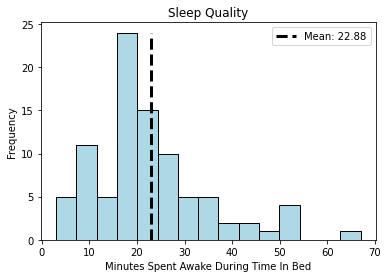

In [9]:
import utils
import matplotlib.pyplot as plt
import numpy as np

x = sleep_activity_df["Awake"].copy().values
utils.create_histogram(x, "Sleep Quality", "Minutes Spent Awake During Time In Bed")

It appeared that the data was somewhat normally distributed, although it showed signs of being right-skewed. These could be data points where I was in bed for much longer than usual, such as on the weekend. To see if I could mitigate this result, I created an attribute that is the percentage of time in bed spent awake (Awake / Time in Bed). I used the `numpy` module to use vectorized operations on nd-arrays.

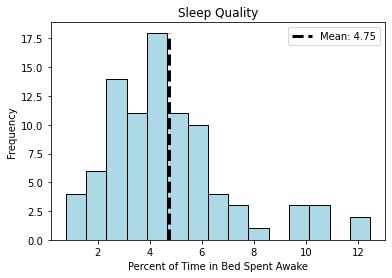

In [10]:
min_awake = np.array(sleep_activity_df["Awake"].copy().values)
min_in_bed = np.array(sleep_activity_df["Time in Bed"].copy().values)
percent_awake = (min_awake / min_in_bed) * 100
sleep_activity_df["% Awake"] = percent_awake
sleep_activity_df.to_csv(cleaned_data_path) # updating csv file

# creating histogram
x = sleep_activity_df["% Awake"].copy().values
utils.create_histogram(x, "Sleep Quality", "Percent of Time in Bed Spent Awake")

The "% Awake" attribute was more normally distributed, and it accounted for the differing amounts of time spent in bed. Since the "Times Awake" attribute only contains values 0 through 3, I used the "% Awake" attribute to classify my sleep quality, as I think it is the most telling out of all the attributes. I categorized each night of sleep into one of four categories: heavily disrupted, moderately disrupted, moderately restful, and restful. I put the values into the categories using the four quartiles of the data, as seen in the [box plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.boxplot.html) below. This strategy allowed the categories to contain roughly equivalent amounts. Again, the plot function is contained within `utils.py`.

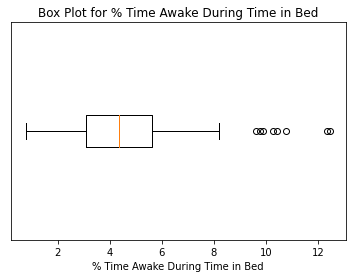

In [11]:
utils.create_box_plot(percent_awake, "% Time Awake During Time in Bed")

In [12]:
sleep_quality = pd.Series(dtype=str)

percent_awake = sleep_activity_df["% Awake"].copy()
percent_awake = percent_awake.sort_values()
index = percent_awake.index
x_len = len(percent_awake)

for i in range(x_len):
    date = index[i]
    if date[0] is "9":
        date = "0" + date
    elif len(date) is 9 and date[0] is not "9": # puts 0 in fron of single digit days for sorting (10/1 to 10/01)
        date = date[:3] + "0" + date[3:]
    if i >= 0 and i < x_len // 4: # the first quarter of data
        sleep_quality[date] = "restful"
    elif i >= x_len // 4 and i < 2*(x_len // 4): # the second quarter of data
        sleep_quality[date] = "moderately restful"
    elif i >= 2*(x_len // 4) and i < 3*(x_len // 4): # the third quarter of data
        sleep_quality[date] = "moderately disrupted"
    elif i >= 3*(x_len // 4) and i < x_len: # the fourth quarter of data
        sleep_quality[date] = "heavily disrupted"
sleep_quality.sort_index(inplace=True)
sleep_quality.index = sleep_activity_df.index # changing index back to original format
sleep_activity_df["Sleep Quality"] = sleep_quality

print(sleep_quality.value_counts())

heavily disrupted       24
moderately restful      22
restful                 22
moderately disrupted    22
dtype: int64


### Exercise Amount Label
This label was only used during the hypothesis testing section of the project. Once I had distinct labels categorizing the exercise I got during a day, I used the `groupby()` function to seperate out each of these data groups. I then used hypothesis testing to see if there is a difference in the sleep I get during the days where I have little to no exercise and the sleep I get during the days where I get a high amount of exercise.

The activity calories (Act. Cals) was the most ideal attribute to categorize my exercise amount. Unlike the multiple minutes attributes, activity calories represents how much exercise I got in a day in one attribute. Again, the category label was not perfect, but it allowed for some interesting grouping of data. 

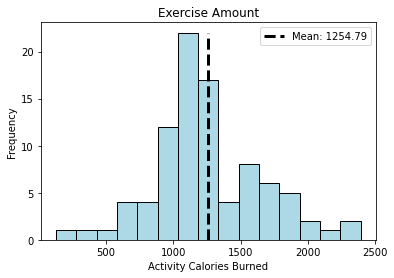

In [13]:
x = sleep_activity_df["Act. Cals"].copy().values
utils.create_histogram(x, "Exercise Amount", "Activity Calories Burned")

This data was somewhat normally distributed, so it was good to use t-tests with later on. I also categorized each day in a similar way as the sleep data, using the quartiles. There are four categories: inactive, lightly active, fairly active, and highly active. These categories are not to be confused with the attribute labels of similar names. 

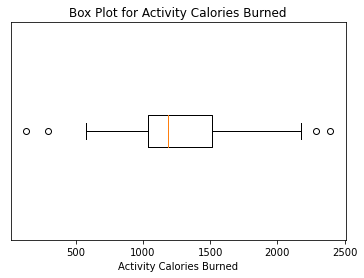

In [14]:
utils.create_box_plot(sleep_activity_df["Act. Cals"].values, "Activity Calories Burned")

In [15]:
exercise_amount = pd.Series(dtype=str)

act_calories = sleep_activity_df["Act. Cals"].copy()
act_calories = act_calories.sort_values()
index = act_calories.index
x_len = len(act_calories)

for i in range(x_len):
    date = index[i]
    if date[0] is "9":
        date = "0" + date
    elif len(date) is 9 and date[0] is not "9": # puts 0 in fron of single digit days for sorting (10/1 to 10/01)
        date = date[:3] + "0" + date[3:]
    if i >= 0 and i < x_len // 4: # the first quarter of data
        exercise_amount[date] = "inactive"
    elif i >= x_len // 4 and i < 2*(x_len // 4): # the second quarter of data
        exercise_amount[date] = "lightly active"
    elif i >= 2*(x_len // 4) and i < 3*(x_len // 4): # the third quarter of data
        exercise_amount[date] = "fairly active"
    elif i >= 3*(x_len // 4) and i < x_len: # the fourth quarter of data
        exercise_amount[date] = "highly active"
exercise_amount.sort_index(inplace=True)
exercise_amount.index = sleep_activity_df.index # changing index back to original format
sleep_activity_df["Exercise Amount"] = exercise_amount
print(exercise_amount.value_counts())

# writing labels data to csv file for reference
labels_path = os.path.join("files", "data_labels.csv")
sleep_activity_df[["Exercise Amount", "Sleep Quality"]].to_csv(labels_path)

highly active     24
lightly active    22
inactive          22
fairly active     22
dtype: int64


## Exploratory Data Analysis and Visualizations
I used `matplotlib` to make conjectures that I could then test using hypothesis testing. The first bar chart I made was the average percentage of time awake during time in bed for each exercise amount label, and the second bar chart I made was the average activity calories burned during each sleep quality label. The formula for average for each of the labels is:
$$ \overline{x} = \frac{\sum_{i=1}^nx_i}{n} $$

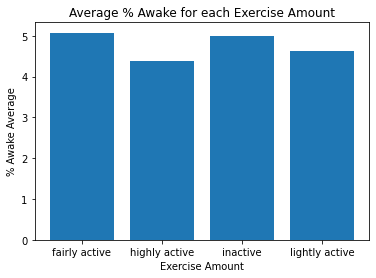

In [16]:
grouped_by_exercise = sleep_activity_df.groupby("Exercise Amount")
grouped_by_sleep = sleep_activity_df.groupby("Sleep Quality")

awake_perc_means = pd.Series(dtype=float)
for group_name, group_df in grouped_by_exercise:
    awake_perc_means[group_name] = (np.mean(group_df["% Awake"]))
plt.figure()
plt.ylabel("% Awake Average")
plt.xlabel("Exercise Amount")
plt.title("Average % Awake for each Exercise Amount")
plt.bar(awake_perc_means.index, awake_perc_means)
plt.show()
plt.close()

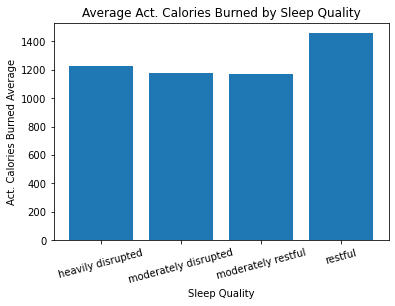

In [17]:
act_cals_means = pd.Series(dtype=float)
for group_name, group_df in grouped_by_sleep:
    act_cals_means[group_name] = (np.mean(group_df["Act. Cals"]))
plt.figure()
plt.ylabel("Act. Calories Burned Average")
plt.xlabel("Sleep Quality")
plt.xticks(rotation=15)
plt.title("Average Act. Calories Burned by Sleep Quality")
plt.bar(act_cals_means.index, act_cals_means)
plt.show()
plt.close()

Based upon my initial hypotheses and these charts, I used hypothesis testing to compare the means of the highly active and inactive exercise categories, and then the means of the restful and heavily disrupted sleep categories. 

## Hypothesis Testing
In the following cell, I completed two hypothesis tests. The steps were the same for both, so I only listed them once. I compared the mean percent of time spent awake in the inactive label to the mean in the highly active label. If the results are significant, I would be able to say that I spend more of my time in bed awake on nights when I get less exercise. The second test is comparing the mean activity carlories burned on days where I get restful sleep that night versus days where I get heavily disrupted sleep that night. If the results are significant, I would be able to say that I got more exercise on days where I slept better. I already have a notion about what direction I think would occur, so I am using a one-tailed test, as well as a two-sampled independent test since I am comparing two groups that are not related.

### 1. Identifying Hypotheses
There is direction in this test, so with $\mu_1$ being the mean % awake for inactive days or mean activity calories burned on days where I get restful sleep, and $\mu_2$ being the mean % awake for highly active days or mean activity calories burned on days where I get disrupted sleep, the hypotheses are:
$$ H_0: \mu_1 \leq \mu_2 $$
$$ H_1: \mu_1 > \mu_2 $$
### 2. Selecting Level of Significance
$$ \alpha = 0.10 $$
I used the significance level of 0.10 because I did not have that much data, and would have used a lower significance level had I had a few more months of data collection.
### 3. Selecting Test Statistic
Since this is an independent two-sampled test as described above, the t-statistic is:
$$ t = \frac{\overline{x}_1 - \overline{x}_2}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}} $$
and will be calculated by the `SciPy` function `ttest_ind()`.
### 4. Formulating Decision Rule
Per the t-distribution table, a t-critical value with df = 44, significance level of 0.10, and one-tailed test is 1.3011.
* If t-computed is $>$ 1.3011, reject $H_0$.
* If t-computed is $\leq$ 1.3011, the test fails to reject $H_0$.

### 5. Making Decision
The `scipy.stats` module will be used with a simple `if` statement to make a decision. 

In [18]:
import scipy.stats as stats
inactive_awake = grouped_by_exercise.get_group("inactive")["% Awake"].values
active_awake = grouped_by_exercise.get_group("highly active")["% Awake"].values
restful_exercise = grouped_by_sleep.get_group("restful")["Act. Cals"]
disrupted_exercise = grouped_by_sleep.get_group("heavily disrupted")["Act. Cals"]

alpha = 0.10
t_computed1, p_value1 = stats.ttest_ind(inactive_awake, active_awake)
t_computed2, p_value2 = stats.ttest_ind(restful_exercise, disrupted_exercise)

print("% Awake Based on Exercise Test")
print("t-compt:", t_computed1, "p-value:", p_value1)
if p_value1 < alpha and t_computed1 > 0:
    print("Reject H0")
else: 
    print("Do not reject H0")
print()
print("Exercise Based on Sleep Test")
print("t-compt:", t_computed2, "p-value:", p_value2)
if p_value2 < alpha and t_computed2 > 0:
    print("Reject H0")
else: 
    print("Do not reject H0")

% Awake Based on Exercise Test
t-compt: 0.9427627173497284 p-value: 0.35095019616430734
Do not reject H0

Exercise Based on Sleep Test
t-compt: 1.7686383259782401 p-value: 0.08388642333452993
Reject H0


The first test did not give significant evidence to reject the null hypothesis, so I could not say that the amount of time I spent in bed awake was significantly different on days when I was inactive compared to days when I was highly active. However, my second test did give significant results. Based on this test, there is significant statistical evidence at the 0.10 significance level to suggest that the mean activtity calories burned is higher on days where I get restful sleep that night, compared to days where I get heavily disrupted sleep at night. 

## Classification
For classification, I used the two main classifiers that we went over in class, a kNN classifier and a decision tree classifier, both from the `sklearn` module. I used the hold out method with 75% of the data for training and 25% for testing. The feature predicted was the sleep quality. Given some arbitrary data, the goal is to be able to predict what kind of sleep I would get. To do this, I worked only with the numerical activity features. The first thing I did was test the kNN classifier.

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

y = sleep_activity_df["Sleep Quality"].copy()
X_features = sleep_activity_df.drop(columns=["Sleep Quality", "Exercise Amount", "Month", "Asleep", "Awake", "Times Awake", "Time in Bed", "% Awake"])
scaler = MinMaxScaler()
X = scaler.fit_transform(X_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy:", accuracy)

accuracy: 0.2608695652173913


After changing the k value in the kNN classifier multiple times, I discovered I could never get an accuracy much higher than 25%. Since I had four labels I was trying to predict, the algorithm on this data did not work any better than randomly guessing. Either it would require a better algorithm, or the data was not accurate or sophisticated enough to use for predicitions. I also tried a decision tree classifier with the same training and testing sets.

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
accuracy = tree_clf.score(X_test, y_test)
print("accuracy:", accuracy)

accuracy: 0.08695652173913043


The accuracy for the decision tree classifer was even worse at a dismal 9 percent accuracy. I do not know exactly why the sleep quality label is so unpredictable, especially considering the fact that one of the hypothesis tests gave significant results. I tried one more thing to improve the accuracy, namely removing some of the columns. 

In [21]:
y = sleep_activity_df["Sleep Quality"].copy()
X_features = X_features.drop(columns=["Floors", "MLA", "MS", "MFA"])
scaler = MinMaxScaler()
X = scaler.fit_transform(X_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy:", accuracy)

accuracy: 0.43478260869565216


The accuracy was much better with the above columns removed. It seemed that these features were somewhat sporatic across the dataset, and so it is likely that they were less accurate than a feature such as activity calories burned. I created a decision tree classifier again, without the additional columns this time.

In [22]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
accuracy = tree_clf.score(X_test, y_test)
print("accuracy:", accuracy)

accuracy: 0.17391304347826086


The accuracy for the decision tree also went up significantly with the other columns removed. The kNN classifer was still the better algorithm though, at approximately 43% accuracy.

## Conclusion
#### Summary
This project implemented many of the tools learned in CPSC 222. I used my Fitbit data to analyze the relationship between my sleep and exercise patterns. The main steps in this project were data cleaning, instance labeling, and analysis. The struggle I had with the classification aspect of the project was creating my own label, as the data did not have its own. The data was also largely unpredictable, as reflected by the low classifier-accuracy scores. 
#### Results
I did two hypothesis tests, which were the main tools in making a conclusion. The one that did not provide significant results was the difference in mean percentage awake of time in bed for my active versus inactive days. Using hypothesis testing, I did prove that there is significant evidence to suggest that I burn more activity calories on the days when I get more restful sleep. Unfortunately, the classification results show that the data set was not effective for predicting the sleep quality based on my created label. Using the results of the hypothesis tests and inaccuracy of classifiers, I can not say anything for sure about the direct relationship between sleep and exercise using my data. Although I did get results from one of the hypothesis tests, it is likely that there are many more variables that affect sleep than just exercise. It is my conjecture that a much more detailed and controlled experiment could prove their relationship, but a certain conclusion cannot be made from my project alone. 
#### Possible Errors
There are many things that could have led this data to be inaccurate. The Fitbit device I used during the data collection process is roughly five years old, so it is likely that the device is both outdated and collected impercise measurements. It is also the case that there had to be many more variables that affected my sleep quality. The amount of sleep I received in preceeding nights as well as the amount of stress due to my environment are just two of the many possible confounding variables. I also might have been able to produce better results if I had categorized the sleep quality into more than just the four labels. 
#### Ethical Impacts
The main ethical problem with this project would be generalizing the data of one person to multiple people. While the data and the results might be very telling of me, that does not mean recommendations should be made for other people based on this data. Health is a very important thing, but it is also a very personal thing. Everyone's health care should be personalized. In order to say anything about the population in general, data would have to be collected on many more people than just myself. 